In [27]:
from zget_data import get_responses, get_qdetails, page_map, attention
import pandas as pd
import json

In [28]:
password_response, time_response, survey_response = get_responses(1)

## Password Analysis

In [29]:
pd.DataFrame(password_response)

,password2,password2_recall1,password2_recall2,password2_recall3
0,6IctttoCM^,NaN,NaN,NaN
1,1trdiayw$&,1trdiayw&$,1trdiayw&$,NaN
2,Chevy68#,NaN,NaN,NaN
3,igahot6844$,NaN,NaN,NaN
4,Password123!,NaN,NaN,NaN
5,ihtgoojd24,NaN,NaN,NaN
6,Bwmfd1!,NaN,NaN,NaN
7,IWTCDTE!,NaN,NaN,NaN
8,MD!wtsf,NaN,NaN,NaN
9,6754$#,NaN,NaN,NaN


## Time Analysis

,startstudy,fpasssurvey,pagegif,desinint,quest,csquest,motivation,spass,scog,spasssurvey,spassrecall,demo,total (mins)
0,320.098,70.347,8.202,17.538,67.491,274.386,14.882,78.530,13.076,51.190,18.026,87.482,17.020800
1,10.255,32.479,18.423,107.595,84.749,322.202,17.036,101.708,27.493,65.827,68.461,60.278,15.275100
2,3.005,14.405,8.269,28.876,71.381,263.868,5.077,94.804,15.165,45.252,13.180,50.644,10.232100
3,47.552,27.253,9.852,122.930,47.599,223.082,24.884,69.051,16.381,40.184,21.445,95.529,12.429033
4,1.901,15.514,5.053,110.151,181.442,86.245,4.489,94.392,17.619,37.438,7.374,22.499,9.735283


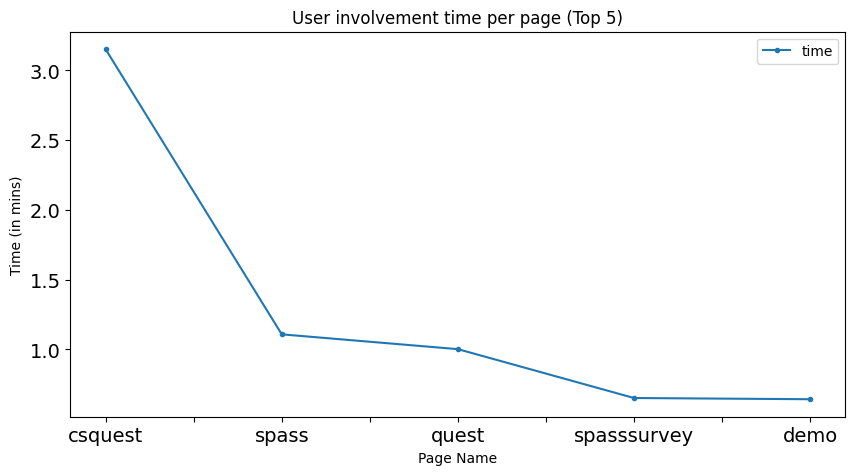

In [30]:
page_time_df = pd.DataFrame(time_response)
page_time_df = page_time_df.sort_index(axis=1, key=lambda x: x.astype(int))
page_time_df = page_time_df.rename(page_map, axis=1)
page_time_df['total (mins)'] = page_time_df.sum(axis=1)/60
display(page_time_df.head())

# top 5 pages with higher time
top5 = pd.DataFrame(columns=['page', 'time'])
for i, data in page_time_df.median().div(60).sort_values(ascending=False).head(5).items():
    top5 = pd.concat([top5, pd.DataFrame([[i, data]], columns=top5.columns)])

_ = top5.plot(x='page', y='time', figsize=(10, 5), xlabel="Page Name", ylabel="Time (in mins)", title="User involvement time per page (Top 5)", fontsize=14, style=".-")

## Survey Response Analysis

In [31]:
survey_response_df = pd.DataFrame(survey_response)

### Quest

In [32]:
normqsid = ['1-2', '1-4', '1-7', '1-10', '1-12', '1-13', '1-16']
quest = pd.DataFrame(survey_response_df['7'].to_dict()).astype(int)
quest.drop(attention.get('7'), inplace=True)
normquest = 8 - quest.loc[normqsid]
quest.update(normquest)

new_index = {}
for qsid in quest.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('7', qsid).replace("'", '"')).get('elements').get(likert_scale)
new_index
quest = quest.rename(new_index)
quest['mean'] = quest.mean(axis=1)
quest['median'] = quest.median(axis=1)
quest

/var/folders/y0/_c2r85zn1137ydw7ltj1v0pr0000gq/T/ipykernel_97734/349911366.py:5: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  quest.update(normquest)


,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,mean,median
rewarding,6.0,6.0,6.0,6.0,2.0,5.0,6.0,5.0,4.0,1.0,...,7.0,2.0,4.0,5.0,4.0,7.0,4.0,3.0,4.933333,5.000000
organized,7.0,7.0,7.0,5.0,4.0,6.0,6.0,7.0,7.0,6.0,...,4.0,7.0,3.0,7.0,4.0,7.0,6.0,4.0,5.911111,6.000000
structured,7.0,7.0,6.0,5.0,5.0,5.0,6.0,6.0,6.0,5.0,...,2.0,6.0,5.0,7.0,7.0,7.0,6.0,4.0,5.711111,6.000000
well grouped,7.0,6.0,6.0,6.0,3.0,5.0,6.0,6.0,6.0,7.0,...,5.0,6.0,6.0,6.0,6.0,7.0,5.0,4.0,5.866667,6.000000
ordered,7.0,6.0,6.0,5.0,3.0,6.0,6.0,5.0,6.0,4.0,...,5.0,2.0,1.0,7.0,5.0,7.0,7.0,3.0,5.333333,6.000000
beneficial,7.0,7.0,6.0,6.0,2.0,6.0,5.0,6.0,6.0,6.0,...,7.0,1.0,5.0,7.0,2.0,7.0,6.0,4.0,5.288889,6.000000
helpful,7.0,7.0,6.0,6.0,3.0,5.0,6.0,6.0,7.0,4.0,...,7.0,7.0,4.0,7.0,7.0,6.0,5.0,3.0,5.777778,6.000000
easy,5.0,6.0,7.0,6.0,3.0,6.0,3.0,6.0,7.0,6.0,...,1.0,6.0,4.0,7.0,7.0,7.0,5.0,2.0,5.155556,6.000000
appealing,6.0,7.0,6.0,6.0,2.0,4.0,4.0,4.0,6.0,4.0,...,6.0,7.0,5.0,6.0,5.0,6.0,5.0,2.0,5.111111,5.000000
pleasant,4.0,7.0,7.0,6.0,3.0,3.0,6.0,4.0,7.0,5.0,...,7.0,6.0,6.0,5.0,6.0,7.0,5.0,2.0,5.266667,5.133333


### CSQuest

In [33]:
csquest = pd.DataFrame(survey_response_df['8'].to_dict())

qualindex = ['9-1', '11-1']
csquestqual = csquest.loc[qualindex]
csquestqual.to_csv('qualitative/csquest_infographics.csv')
csquestqual

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
9-1,"[Social Media, Email, Financial Websites]","[Social Media, Email, Financial Websites, Gami...","[Social Media, Gaming Websites]",[Social Media],[None of the above],"[Email, Government Websites]",[Financial Websites],"[Social Media, Financial Websites, E-commerce ...","[Social Media, Course Management Websites, e.g...","[Financial Websites, Government Websites, Cour...",...,"[Social Media, Email, Financial Websites, Gove...","[Social Media, Email, Financial Websites, E-co...","[Social Media, Financial Websites, Gaming Webs...","[Social Media, Gaming Websites, E-commerce Web...","[Financial Websites, Government Websites, Cour...","[Social Media, Email, E-commerce Websites, Cou...","[Gaming Websites, Course Management Websites, ...","[Social Media, Email, E-commerce Websites]","[Financial Websites, Government Websites, Cour...",[Social Media]
11-1,"I like the idea. I like the example phrase ""I ...",This is entertaining and relatable! It is an i...,I think the design looks nice and it was well ...,I think the strategy if easy to follow but I t...,I thought about if I would personally use this...,For me it is way too many steps as I already k...,"I like it, it is simple like texting with a fr...",It is nice. Simple to read and understand. S...,I think that it is clean and concise and under...,It is good and very strong to create online ac...,...,I think it is simple yet very informative. It ...,It looks like a text message exchange between ...,It's very creative and easy to understand with...,social media presentation,It is easy to evaluate and create ideas for st...,I think it is straight forward and presents a ...,It is easy to evaluate and create some strong ...,It was simple and clean.,It's in a simple comic format that nothing rea...,Seems simple and affective. I wish the numbers...


In [34]:
csquestquant = csquest.drop(qualindex).fillna(0).astype(int)
csquestquant.drop(attention.get('8'), inplace=True)

normqsid = []
normcsquestquant = 8 - csquestquant.loc[normqsid]
csquestquant.update(normquest)

new_index = {}
for qsid in csquestquant.index:
    new_index[qsid] = json.loads(get_qdetails('8', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
csquestquant = csquestquant.rename(new_index)
csquestquant['mean'] = csquestquant.mean(axis=1)
csquestquant['median'] = csquestquant.median(axis=1)

csquestquant

/var/folders/y0/_c2r85zn1137ydw7ltj1v0pr0000gq/T/ipykernel_97734/3295141098.py:6: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  csquestquant.update(normquest)


,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,mean,median
Stimulates me to create a strong password,6.0,6.0,6.0,5.0,6.0,7.0,6.0,6.0,4.0,6.0,...,7.0,7.0,6.0,6.0,5.0,7.0,3.0,5.0,5.511111,6.000000
Makes me put trust on the presented password creation strategy,5.0,7.0,6.0,6.0,5.0,7.0,6.0,5.0,5.0,4.0,...,6.0,6.0,4.0,6.0,4.0,6.0,4.0,5.0,5.222222,6.000000
Encourages me to use the presented password creation strategy in real life,6.0,7.0,6.0,6.0,5.0,7.0,7.0,6.0,6.0,6.0,...,7.0,7.0,7.0,6.0,6.0,7.0,2.0,5.0,5.688889,6.000000
,7.0,7.0,6.0,6.0,5.0,6.0,6.0,6.0,6.0,3.0,...,7.0,6.0,5.0,6.0,3.0,6.0,6.0,6.0,5.711111,6.000000
Encourages me to create a strong password,7.0,7.0,6.0,6.0,6.0,7.0,7.0,7.0,4.0,3.0,...,7.0,7.0,3.0,6.0,4.0,7.0,4.0,6.0,5.644444,6.000000
Makes me feel capable of creating a strong password,6.0,7.0,6.0,6.0,4.0,6.0,7.0,7.0,6.0,5.0,...,7.0,6.0,5.0,6.0,6.0,7.0,5.0,5.0,5.688889,6.000000
Makes me feel confident that I can create a strong password,6.0,7.0,6.0,6.0,5.0,7.0,7.0,7.0,6.0,5.0,...,7.0,7.0,2.0,7.0,6.0,7.0,4.0,5.0,5.755556,6.000000
,6.0,4.0,6.0,6.0,3.0,3.0,6.0,4.0,7.0,3.0,...,7.0,6.0,6.0,6.0,3.0,7.0,6.0,5.0,5.244444,6.000000
,7.0,0.0,0.0,0.0,0.0,6.0,6.0,0.0,0.0,6.0,...,0.0,7.0,4.0,7.0,5.0,7.0,0.0,5.0,3.600000,5.000000
Novel,7.0,7.0,6.0,6.0,2.0,5.0,7.0,5.0,3.0,5.0,...,6.0,7.0,5.0,5.0,5.0,7.0,3.0,4.0,5.333333,5.166667


### First Password Survey

In [35]:
normqsid = []
fpass = pd.DataFrame(survey_response_df['3'].to_dict()).astype(int)
normfpass = 8 - fpass.loc[normqsid]
fpass.update(normfpass)
fpass

new_index = {}
for qsid in fpass.index:
    likert_scale = 'low' if qsid in normqsid else 'high'
    new_index[qsid] = json.loads(get_qdetails('3', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
fpass = fpass.rename(new_index)
fpass['mean'] = fpass.mean(axis=1)
fpass['median'] = fpass.median(axis=1)
fpass

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,mean,median
"I do not change my passwords, unless I have to.",6,6,2,6,7,5,6,2,7,4,...,5,6,4,3,5,7,6,5,5.066667,6.000000
I use different passwords for different online accounts that I have.,5,6,6,5,5,7,5,6,1,6,...,2,7,6,7,6,6,2,5,5.444444,6.000000
"When I create a new online account, I try to use a password that goes beyond the site’s minimum requirements.",4,7,6,5,6,7,6,6,1,6,...,7,7,5,6,3,7,3,4,5.288889,6.000000
I do not include special characters in my password if it’s not required.,3,1,1,2,4,1,2,2,5,5,...,2,6,7,1,7,6,5,3,3.688889,3.844444


### Second Password Survey

In [36]:
spass = pd.DataFrame(survey_response_df['12'].to_dict())

qualindex = ['8-1']
spassqual = spass.loc[qualindex]
spassqual

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
8-1,I used a variation of the strategy presented i...,I used a variation of the strategy presented i...,I used a variation of the strategy presented i...,I used a variation of the strategy presented i...,I used a totally different strategy.,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used a variation of the strategy presented i...,I used the same strategy presented in the design.,I used a totally different strategy.,...,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used the same strategy presented in the design.,I used a variation of the strategy presented i...,I used a totally different strategy.,I used the same strategy presented in the design.,I used a totally different strategy.,I used a variation of the strategy presented i...,I used the same strategy presented in the design.,I used the same strategy presented in the design.


In [37]:
spassquant = spass.drop(qualindex).fillna(0).astype(int)
spassquant.drop(attention.get('8'), inplace=True)

normqsid = []
normspassquant = 8 - spassquant.loc[normqsid]
spassquant.update(normquest)

new_index = {}
for qsid in spassquant.index:
    new_index[qsid] = json.loads(get_qdetails('12', qsid).replace("'", '"').split('\n')[1]).get('title')
new_index
spassquant = spassquant.rename(new_index)
spassquant['mean'] = spassquant.mean(axis=1)
spassquant['median'] = spassquant.median(axis=1)

spassquant

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,mean,median
,6,7,6,6,5,5,6,6,5,4,...,7,7,5,6,5,7,5,4,5.777778,6.000000
Hard to remember,2,3,1,4,1,2,3,2,2,6,...,1,6,5,3,6,7,5,4,3.844444,3.922222
Can be easily guessed by a hacker,2,2,1,2,1,1,2,2,2,3,...,1,7,3,3,4,1,2,2,2.577778,2.000000
Can be easily guessed by my close friends or family members,2,1,1,2,1,1,2,1,1,5,...,1,6,6,1,5,1,1,1,2.311111,1.000000
Stronger than the passwords I usually use,6,7,5,5,4,3,6,4,4,5,...,5,7,3,4,6,7,5,4,5.133333,5.566667
,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2.000000,2.000000
,6,7,5,6,2,5,6,5,7,5,...,7,7,6,5,5,7,5,5,5.666667,6.000000
,2,1,1,2,3,2,6,1,2,6,...,5,7,6,3,4,1,5,3,3.488889,3.000000


### Demographics

In [38]:
demo = pd.DataFrame(survey_response_df['14'].to_dict())

new_index = {}
for qsid in demo.index:
    new_index[qsid] = get_qdetails('14', qsid, 'keyword').split('\n')[0]

demo = demo.rename(new_index).transpose()
demo

,gender,age,race,highest education,education field,occupation,tech experience,cyber experience,adoption security expert
0,Woman,55-59 years old,"[White, Human Caucasian European ]",Four-year College Degree,"Economics, Humanities and Social Sciences",Business or industry,Self-taught,No experience,6
1,Man,55-59 years old,[White],Four-year College Degree,"Mathematics, and Natural Sciences (Physics, Ch...",Freelance,Self-taught,Self-taught,7
2,Woman,50-54 years old,[White],High School Graduate,Business,Business or industry,Self-taught,Self-taught,6
3,Man,55-59 years old,[White],High School Graduate,Construction,Business or industry,Self-taught,No experience,7
4,Man,30-34 years old,[White],Four-year College Degree,"Medicine, Nursing, and Health Sciences",Business or industry,Self-taught,Self-taught,5
5,Man,Above 65 years old,[White],Four-year College Degree,Other areas of Engineering,Business or industry,Hold or held a work position,Hold or held a work position,2
6,Woman,60-64 years old,[White],Four-year College Degree,Business,Business or industry,Self-taught,No experience,6
7,Man,35-39 years old,[White],Four-year College Degree,Business,Business or industry,Self-taught,No experience,7
8,Woman,55-59 years old,[White],Graduate degree (MS/Doctorate),"Mathematics, and Natural Sciences (Physics, Ch...",Non-profit organization,Self-taught,No experience,7
9,Man,25-29 years old,[White],Four-year College Degree,"Computer Science/Engineering, and Information ...",Business or industry,Formal training,Formal training,5


In [39]:
demo['gender'].value_counts()

Man                       32
Woman                     12
I prefer not to answer     1
Name: gender, dtype: int64